In [46]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv(r"E:\Data Sciemce\DataSets\train.csv")

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Since name,ticket,fare and cabin column cannot decide the survival of a person , hence we can delete the name and the ticket column

In [22]:
del df["Name"]

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
del df["Ticket"]

In [26]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [27]:
del df["Fare"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [28]:
del df["Cabin"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


Imputation of Categorical data

In [29]:
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2

df["Gender"]=df["Sex"].apply(getNumber)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


Now we can remove Sex column

In [31]:
del df["Sex"]
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

Replace the null values of the age column such that fill the mean survived age in the column where the person has servived and mean not survived age where the person has not survived

In [33]:
mean_survived=df[df.Survived==1].Age.mean()
mean_survived

28.343689655172415

In [36]:
df["age"]=np.where(pd.isnull(df.Age) & df["Survived"]==1,mean_survived,df["Age"])

In [37]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [39]:
mean_notSurvived=df[df.Survived==0].Age.mean()
mean_notSurvived

30.62617924528302

In [40]:
df.age.fillna(mean_notSurvived,inplace=True)

In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

Now we can delete the original Age column 

In [42]:
del df["Age"]
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


Checking whether the Embarked column is important or not or whether survival of a person depends on it 

In [47]:
survived_Q=df[df.Embarked=='Q'][df.Survived==1].shape[0]
survived_S=df[df.Embarked=='S'][df.Survived==1].shape[0]
survived_C=df[df.Embarked=='C'][df.Survived==1].shape[0]
print(survived_Q)
print(survived_S)
print(survived_C)

30
217
93


In [48]:
survived_Q=df[df.Embarked=='Q'][df.Survived==0].shape[0]
survived_S=df[df.Embarked=='S'][df.Survived==0].shape[0]
survived_C=df[df.Embarked=='C'][df.Survived==0].shape[0]
print(survived_Q)
print(survived_S)
print(survived_C)

47
427
75


We cannot delete the whole embarked column since there are some changes in the survival rate based on the port passangers aboard the ship but we can still delete some rows since it will not affect the result.

In [49]:
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [50]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [52]:
df.rename(columns={'age':'Age'},inplace=True)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [53]:
df.rename(columns={'Gender':'Sex'},inplace=True)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [54]:
def getEmb(str):
    if str=="S":
        return 1
    if str=="Q":
        return 2
    else:
        return 3
df["Embark"]=df["Embarked"].apply(getEmb)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [55]:
del df["Embarked"]
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embark
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


In [56]:
df.rename(columns={"Embark":"Embarked"},inplace=True)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


577
312


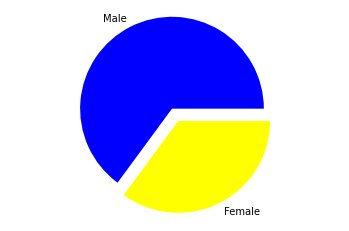

In [61]:
import matplotlib.pyplot as plt
from matplotlib import style

males=(df["Sex"]==1).sum()
females=(df["Sex"]==2).sum()
print(males)
print(females)
p=[males,females]
plt.pie(p,labels=["Male","Female"],colors=["blue","yellow"],explode=(0.15,0),startangle=0)
plt.axis('equal')
plt.show()

In [63]:
Male_survived=df[df.Sex==1][df.Survived==1].shape[0]
print(Male_survived)
Male_not_survived=df[df.Sex==1][df.Survived==0].shape[0]
print(Male_not_survived)
Female_survived=df[df.Sex==2][df.Survived==1].shape[0]
print(Female_survived)
Female_not_survived=df[df.Sex==2][df.Survived==0].shape[0]
print(Female_not_survived)

109
468
231
81


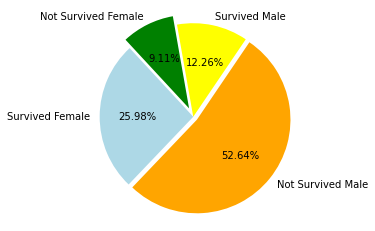

In [65]:
chart=[Male_survived,Male_not_survived,Female_survived,Female_not_survived]
colors=['yellow','Orange','LightBlue','Green']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()